In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

np.random.seed(222)

In [2]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 80

In [3]:
d = pd.read_csv("dataQ2.csv")

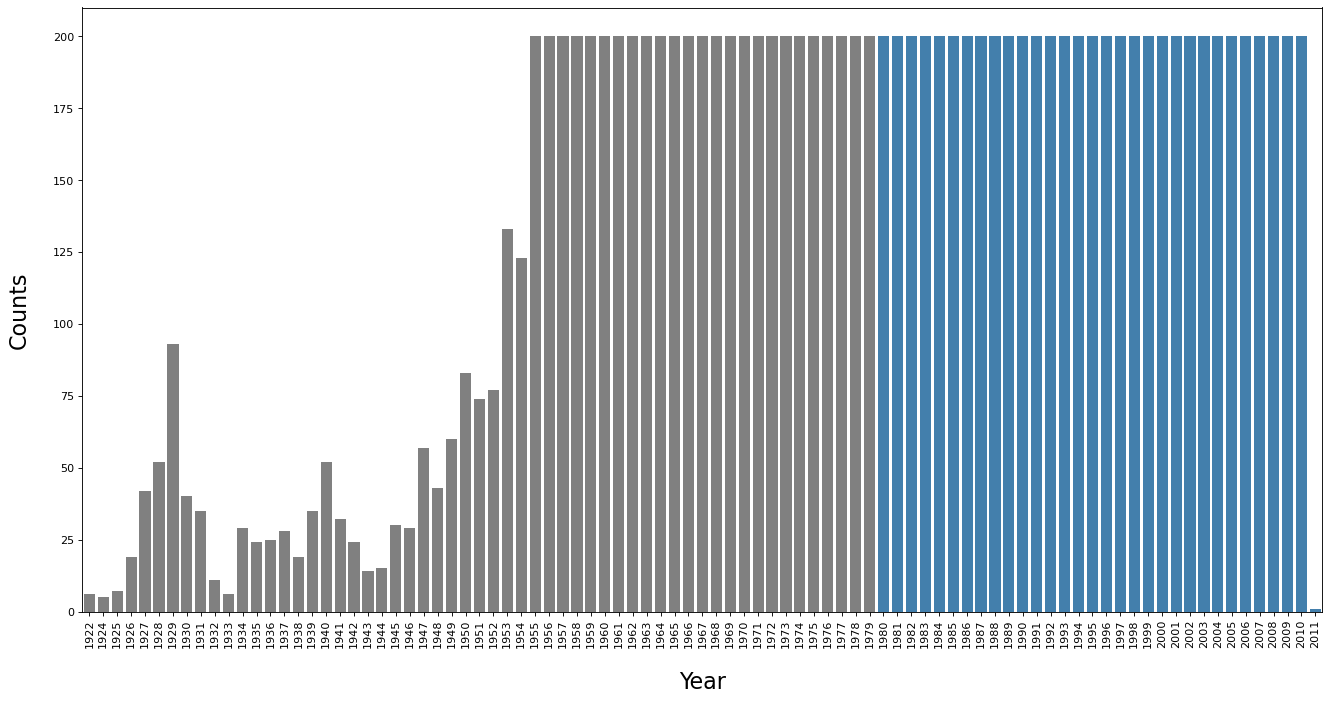

In [4]:
df = d.groupby('V1').count()

clrs = ['grey' if (x < 1980) else '#3282bd' for x in df.index ]

plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
# plot = sns.barplot(x=df.index, y = df.V3, color='#3282bd')
plot = sns.barplot(x=df.index, y = df.V3, palette=clrs)
plot.set_ylabel('Counts', fontsize=20, labelpad=20)
plot.set_xlabel('Year', fontsize=20, labelpad=20)
plt.savefig('Plots/song_year.pdf')
plt.show()

In [5]:
d['V1'] = np.where(d['V1'] >= 1980, 1,0)
d

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91
0,0,35.52117,-173.08203,46.48577,-5.06276,-63.82789,24.02641,-41.02192,4.62923,-16.18052,...,59.13603,-40.20129,-49.39461,24.85517,-5.71430,-211.76905,29.05489,-15.60849,-53.62467,5.16082
1,0,20.82134,-105.06227,-43.18894,-48.94628,9.38217,18.50846,-47.86844,16.39423,-40.76835,...,70.58999,-199.31135,-43.84401,405.88548,-12.19678,-0.66015,676.59875,-26.87764,-62.47564,45.08777
2,0,28.23865,-210.09303,17.52676,2.19025,32.08925,0.44376,11.65822,24.40600,-49.33061,...,32.66179,135.07781,-99.65834,181.84890,-4.89541,-252.83162,70.21382,-2.21501,23.60526,4.99606
3,0,31.96273,-101.69543,41.96745,-4.76271,3.56367,36.30043,7.73083,17.25277,-2.42944,...,40.24099,-247.91642,454.80976,611.16708,-48.77300,56.66697,150.06551,14.10275,81.94839,30.90205
4,0,35.55615,-56.58205,62.04075,-7.53863,-84.55047,36.35813,-57.28277,-1.46895,21.04464,...,24.98972,-119.42711,-184.94459,234.78532,7.44422,-168.61733,244.36084,-25.50052,81.87296,31.26154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12518,1,41.85027,-72.91280,-0.91743,-0.56910,20.32131,6.28893,-10.35466,-6.58849,5.83319,...,17.91337,46.82747,310.92577,29.96655,0.00205,-14.53249,132.69521,7.22473,22.57903,-6.28559
12519,1,45.67364,38.06694,-7.68471,37.00493,0.19723,6.89751,-2.12232,13.43183,3.98728,...,-6.74997,-523.30403,183.75043,197.58643,-2.64476,-276.57394,221.62571,9.30142,121.36623,12.49019
12520,1,40.60182,-16.36778,-17.92755,27.24004,-46.59635,21.70873,-2.80822,6.96902,10.33685,...,25.02185,66.86383,132.74621,125.60392,-9.38491,74.60227,-70.86237,31.16433,21.14029,14.56326
12521,1,43.72307,88.56071,-31.66962,75.56138,-5.13998,10.47427,2.53986,4.77941,-2.54523,...,-21.19333,-1141.21410,446.91688,376.23336,52.55827,182.18457,-50.52141,15.96011,-161.60595,-5.23338


### LDA

In [6]:
y = d['V1']
X = d.loc[:,d.columns != 'V1']



In [7]:
TEST_SIZE = 0.3 

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
lda = LDA(solver='svd', tol=1.e-4)
song_lda = lda.fit(X=X_train, y=y_train)

In [10]:
print(f"Prior probabilities of groups: \n {song_lda.priors_} \n")

Prior probabilities of groups: 
 [0.50467716 0.49532284] 



In [11]:
lda_train = song_lda.predict(X_train)
lda_test = song_lda.predict(X_test)

In [12]:
cf_train = confusion_matrix(y_train, lda_train)
pd.DataFrame(cf_train, columns=["FALSE", "TRUE"], index=["FALSE", "TRUE"])

,FALSE,TRUE
FALSE,3405,1019
TRUE,1024,3318


In [13]:
cf_test = confusion_matrix(y_test, lda_test)
pd.DataFrame(cf_test, columns=["FALSE", "TRUE"], index=["FALSE", "TRUE"])

,FALSE,TRUE
FALSE,1470,428
TRUE,475,1384


AUC of Train: 0.8457471098976064 
AUC of Test: 0.833227241268094


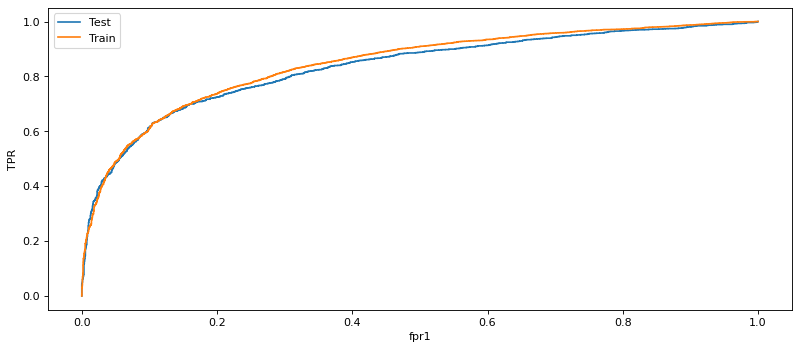

In [14]:
from sklearn.metrics import roc_curve
fpr_1,tpr_1,thresh=roc_curve(y_test,lda.predict_proba(X_test)[:,-1])
auc_score=roc_auc_score(y_test,lda.predict_proba(X_test)[:,-1])

fpr_12,tpr_12,thresh2=roc_curve(y_train,lda.predict_proba(X_train)[:,-1])
auc_score2=roc_auc_score(y_train,lda.predict_proba(X_train)[:,-1])

print(f'AUC of Train: {auc_score2} \nAUC of Test: {auc_score}')

plt.plot(fpr_1,tpr_1, label='Test')
plt.plot(fpr_12, tpr_12, label='Train')
plt.xlabel('fpr1')
plt.ylabel('TPR')
plt.legend()

## KNN

In [15]:
d2 = d.copy()
y = d2['V1']
X = d2.loc[:,d.columns != 'V1']

TEST_SIZE = 0.3

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# X = sc.fit_transform(X)

In [16]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [17]:
#trial:
ks = np.arange(5, 35)
ks = np.array([5,10,15,20,25,30,35,40,45,50])
gs = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        KNeighborsClassifier()
        ),
        param_grid={'kneighborsclassifier__n_neighbors': ks}, 
        cv=KFold(5, shuffle=True, random_state=1234)
).fit(X, y)


{'kneighborsclassifier__n_neighbors': 50}


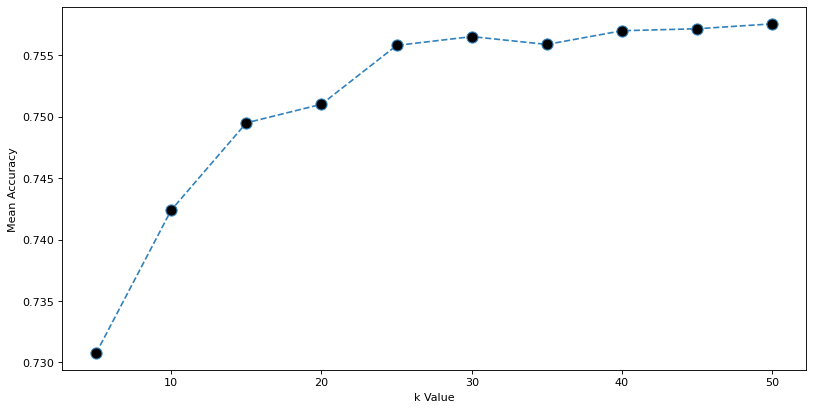

In [18]:
print(gs.best_params_)
test_score = gs.cv_results_['mean_test_score']

plt.figure(figsize=(12, 6))
plt.plot(ks, test_score, color='#3282bd', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.xlabel('k Value')
plt.ylabel('Mean Accuracy')
plt.savefig('Plots/errorknn.pdf')
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors=25)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [20]:
cf_test = confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_test, columns=["FALSE", "TRUE"], index=["FALSE", "TRUE"])

,FALSE,TRUE
FALSE,1478,459
TRUE,479,1341


In [21]:
(479+459)/(1478+459+479+1341)

0.24966728772957147

AUC of Train: 0.8594395254515912 
AUC of Test: 0.8246343615083934


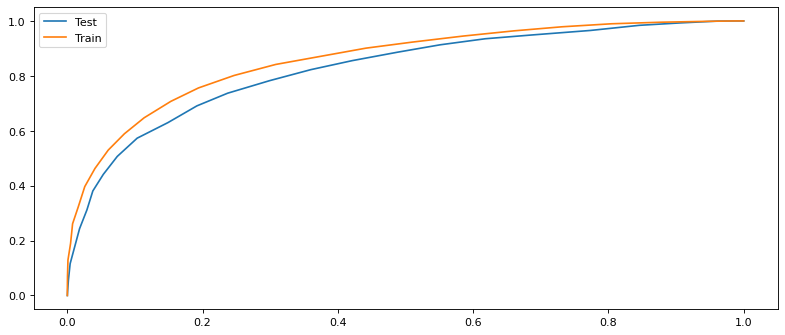

In [22]:
fpr_2,tpr_2,thresh=roc_curve(y_test,classifier.predict_proba(X_test)[:,-1])
auc_score=roc_auc_score(y_test,classifier.predict_proba(X_test)[:,-1])

fpr_22,tpr_22,thresh2=roc_curve(y_train,classifier.predict_proba(X_train)[:,-1])
auc_score2=roc_auc_score(y_train,classifier.predict_proba(X_train)[:,-1])

print(f'AUC of Train: {auc_score2} \nAUC of Test: {auc_score}')

plt.plot(fpr_2,tpr_2, label='Test')
plt.plot(fpr_22, tpr_22, label='Train')
plt.legend()

## Naive Bayes

In [23]:
d3 = d.copy()

y = d3['V1']
X = d3.loc[:,d3.columns != 'V1']

TEST_SIZE = 0.3 # smaller training set to reduce computational cost

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn.naive_bayes import *

NB = GaussianNB()
# NB = MultinomialNB()
# NB = ComplementNB()

nb_fit = NB.fit(X_train, y_train)

y_pred = nb_fit.predict(X_test)

In [25]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 3757 points : 1140


In [26]:
cf_test = confusion_matrix(y_test, y_pred)
pd.DataFrame(cf_test, columns=["FALSE", "TRUE"], index=["FALSE", "TRUE"])

,FALSE,TRUE
FALSE,1069,785
TRUE,355,1548


AUC of Train: 0.7759866657390562 
AUC of Test: 0.7924284655863308


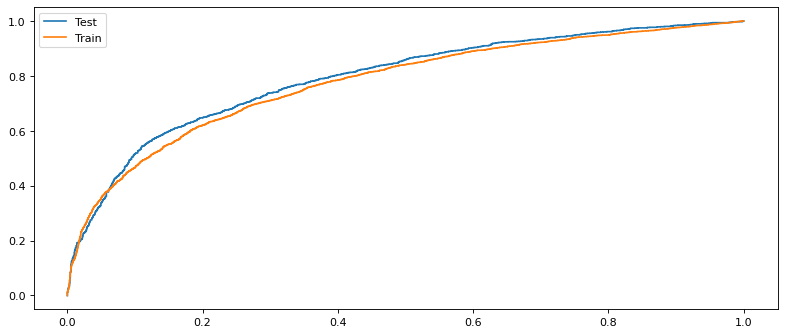

In [27]:
fpr_3,tpr_3,thresh=roc_curve(y_test,NB.predict_proba(X_test)[:,-1])
auc_score=roc_auc_score(y_test,NB.predict_proba(X_test)[:,-1])

fpr_32,tpr_32,thresh2=roc_curve(y_train,NB.predict_proba(X_train)[:,-1])
auc_score2=roc_auc_score(y_train,NB.predict_proba(X_train)[:,-1])

print(f'AUC of Train: {auc_score2} \nAUC of Test: {auc_score}')

plt.plot(fpr_3,tpr_3, label='Test')
plt.plot(fpr_32, tpr_32, label='Train')
plt.legend()

In [28]:
nb_fit.score(X_test, y_test)

0.6965664093691776

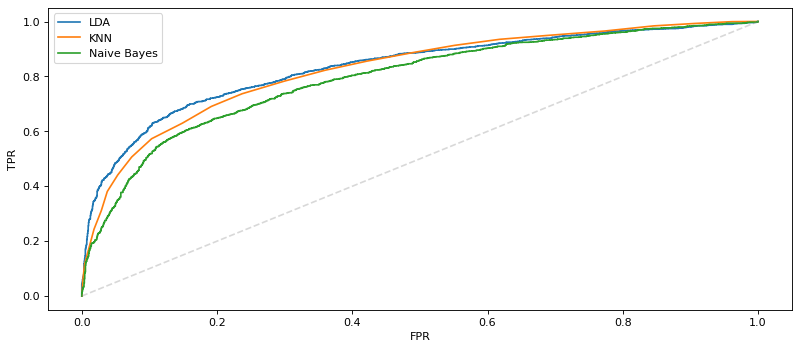

In [29]:
t = np.linspace(0,1,50)
plt.plot(fpr_1,tpr_1, label='LDA')
# plt.plot(fpr_12, tpr_12, label='Train')
plt.plot(fpr_2,tpr_2, label='KNN')
# plt.plot(fpr_22, tpr_22, label='Train')
plt.plot(fpr_3,tpr_3, label='Naive Bayes')
# plt.plot(fpr_32, tpr_32, label='Train')
plt.plot(t, t, '--', alpha=0.3, color='grey')
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('Plots/together_plots.pdf')
plt.show()


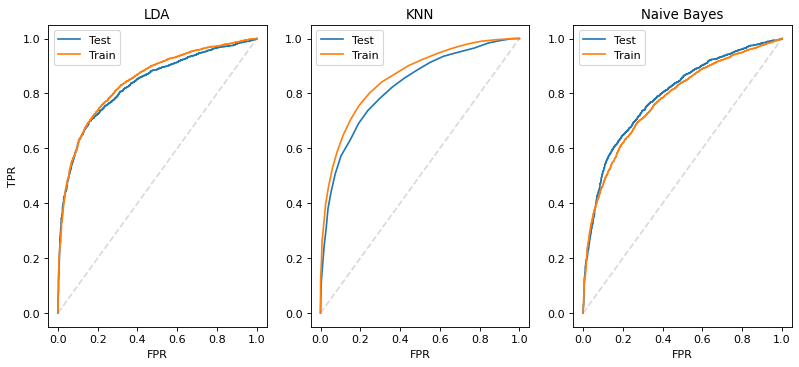

In [30]:
t = np.linspace(0,1,50)
plt.subplot(131)
plt.plot(fpr_1,tpr_1, label='Test')
plt.plot(fpr_12, tpr_12, label='Train')
plt.plot(t, t, '--', alpha=0.3, color='grey')
plt.title('LDA')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.subplot(132)
plt.plot(fpr_2,tpr_2, label='Test')
plt.plot(fpr_22, tpr_22, label='Train')
plt.plot(t, t, '--', alpha=0.3, color='grey')
plt.title('KNN')
plt.xlabel('FPR')
plt.legend()
plt.subplot(133)
plt.plot(fpr_3,tpr_3, label='Test')
plt.plot(fpr_32, tpr_32, label='Train')
plt.plot(t, t, '--', alpha=0.3, color='grey')
plt.title('Naive Bayes')
plt.xlabel('FPR')
plt.legend()
plt.savefig('Plots/allroc.pdf')
plt.show()